In [3]:
# importing packages 
import pandas as pd 
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 
import json

%matplotlib inline 
#%matplotlib qt 

In [4]:
cwd = os.getcwd()

In [5]:
df = pd.read_csv(cwd + "\\earth.csv", delimiter= ';', decimal=",")
#elimino datos no necesarios
#gdf.drop(['Label', 'SubLabel', 'Codigo','Shape_Leng', 'geometry'], axis=1, inplace=True)
df.shape

# remove special character
df.iloc[0,:].str.replace(' ', '')

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,43,44,51,69,85,86,118,119,127,128,136,137,139,140,141,142,143,144,145,146,148,149,154,155,160,161,163,164,169,170,172,173,175,176,178,179,181,182,184,185,186,187,188,190,191,193,194,196,197,199,200,202,203,205,206,207,208,209,210,211,212,214,215,216,217,218,219,220,221,223,224,225,226,227,229,230,232,233,286,287,289,290,292,293,295,296,298,299,304,305,310,311,313,314,346,347,352,353,355,356,358,359,370,371,378,379,380,382,383,388,389,391,392,396,397,398,400,401,403,404,415,416,456,457,458,460,461,463,464,465,466,467,469,470,481,482,496,497) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


SAMPLE ID             ALMARAB-JO-1
IGSN                           NaN
EXPEDITION ID                   nr
REFERENCES         AL-MISHWAT,2004
LATITUDE                       NaN
                        ...       
H2O_P Units.2                  NaN
H2O_P Method.2                 NaN
INDIUM.1                       NaN
INDIUM Units.1                 NaN
INDIUM Method.1                NaN
Name: 0, Length: 498, dtype: object

In [6]:
#concatenar datasets
#df= pd.concat([df, df], ignore_index=True)

In [7]:
lista = df.columns.to_list()

In [8]:
df['CAO'] = df['CAO'].str.replace(',', '.').astype(float)
df['CAO'][0]


12.65

In [47]:
elemento=['SIO2', 'TIO2', 'AL2O3', 'CR2O3', 'FE2O3', 'FE2O3T', 'FEO', 'FEOT', 'NIO', 'MNO', 'MGO', 'CAO', 'SRO', 'NA2O',
 'K2O', 'P2O5', 'BAO', 'LOI', 'H2O', 'H2O_M', 'H2O_P', 'SO3', 'COO', 'MN', 'NI', 'CO', 'CU', 'CD', 'ZN', 'AS', 'AG', 'S',
 'ZRO2', 'AL', 'CA', 'HE', 'HE3', 'LA', 'CE', 'PR', 'ND', 'SM', 'EU', 'GD', 'TB', 'DY', 'HO', 'ER', 'TM', 'YB', 'LU', 'CO2',
 'F', 'CL', 'AU', 'B', 'BA', 'BE', 'BI', 'CR', 'CS', 'GA', 'GER', 'HF', 'INDIUM', 'IR', 'K', 'LI', 'MO', 'NA', 'NB', 'OS', 'P',
 'PB', 'PD', 'PT', 'RB', 'RE', 'RH', 'RU', 'SB', 'SC', 'SN', 'SR', 'TA', 'TH', 'TI', 'TL', 'U', 'V', 'W', 'Y', 'ZR']
len(elemento)

93

In [272]:
to =int(len(elemento)/10)
to =1

for i in range(7):
    for j in range(7):
        #print(i+j)
        dfni = df.iloc[:,:][df[elemento[i+to]].isna()==False]
        dfti = dfni.iloc[:,:][df[elemento[j+to]].isna()==False]
        #plt.subplot(7,7,i*10+j+1)
        #plt.scatter(x=dfti[elemento[i+to]], y= dfti[elemento[j+to]], alpha=0.2)
        #plt.title(elemento[i+to]+' vs '+ elemento[j+to])

#plt.rcParams["figure.figsize"] = (30,20)
#plt.show()  
#dfti.head()        
        

        

<ipython-input-272-78cd14e43a29>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfti = dfni.iloc[:,:][df[elemento[j+to]].isna()==False]


IndexError: string index out of range

In [ ]:
oxidos=['SIO2', 'TIO2', 'AL2O3', 'CR2O3', 'FE2O3', 'FE2O3T', 'FEO', 'FEOT', 'NIO', 'MNO', 'MGO', 'CAO', 'SRO', 'NA2O']

<ipython-input-5-7a77bcfa8244>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfti = dfni.iloc[:,:][df[elemento[1]].isna()==False]
<ipython-input-5-7a77bcfa8244>:40: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfti = dfni.iloc[:,:][df[elemento[1]].isna()==False]
<ipython-input-5-7a77bcfa8244>:45: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfti = dfni.iloc[:,:][df[elemento[1]].isna()==False]
<ipython-input-5-7a77bcfa8244>:50: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfti = dfni.iloc[:,:][df[elemento[1]].isna()==False]


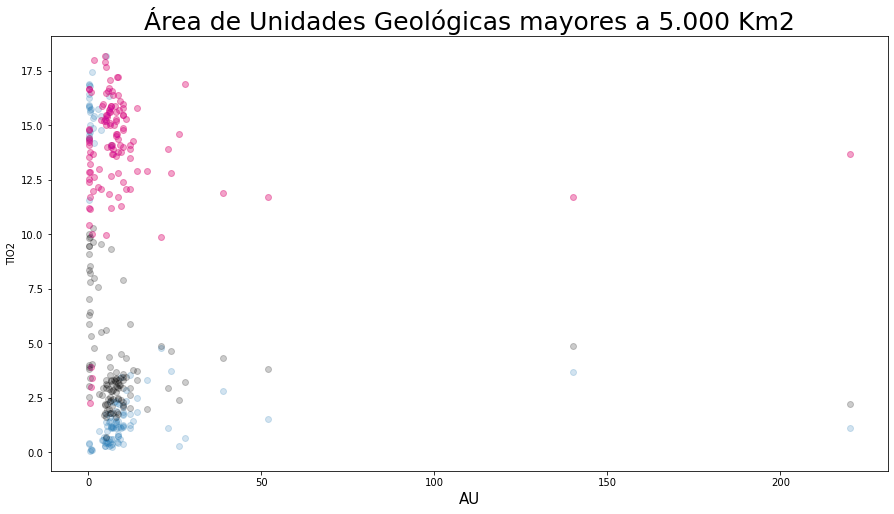

In [5]:
elemento = ['AU', 'TIO2']
dfni = df.iloc[:,:][df[elemento[0]].isna()==False]
dfti = dfni.iloc[:,:][df[elemento[1]].isna()==False]
#dfti.reset_index(drop=True, inplace=True)

#elemento = elemento.astype(np.float)
plt.rcParams["figure.figsize"] = (15,8)

plt.scatter(x=dfti[elemento[0]], y= dfti[elemento[1]],zorder=2, alpha = 0.2)
#plot = dfni.plot(kind='scatter', x=dfti[elemento[0]].to_list(), y= dfti[elemento[1]].to_list(),zorder=2, legend=None)
# Turn on the grid

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True,
    labelleft=True) # labels along the bottom edge are off


#plt.grid(axis = 'y', linestyle='solid',zorder=0)
#plt.grid(which='major', linestyle=':', linewidth='0.2', color='green')
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.title("... Vs Otros elementos",fontsize=25,fontweight=300)
plt.xlabel(elemento[0],fontsize=15,rotation=0)

#FUNCIÓN PARA AGREGAR ETIQUETAS DE DATOS
#add_value_labels(plot)

plt.ylabel(elemento[1])
#plt.grid()




elemento = ['AU', 'AL2O3']
dfni = df.iloc[:,:][df[elemento[0]].isna()==False]
dfti = dfni.iloc[:,:][df[elemento[1]].isna()==False]
plt.scatter(x=dfti[elemento[0]], y= dfti[elemento[1]],zorder=2, color='r', alpha = 0.2)

elemento = ['AU', 'FE2O3']
dfni = df.iloc[:,:][df[elemento[0]].isna()==False]
dfti = dfni.iloc[:,:][df[elemento[1]].isna()==False]
plt.scatter(x=dfti[elemento[0]], y= dfti[elemento[1]],zorder=2, color='k', alpha = 0.2)

elemento = ['AU', 'AL2O3']
dfni = df.iloc[:,:][df[elemento[0]].isna()==False]
dfti = dfni.iloc[:,:][df[elemento[1]].isna()==False]
plt.scatter(x=dfti[elemento[0]], y= dfti[elemento[1]],zorder=2, color='m', alpha = 0.2)



#plt.bar(dic.keys(), dic.values([0][0]))
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a float

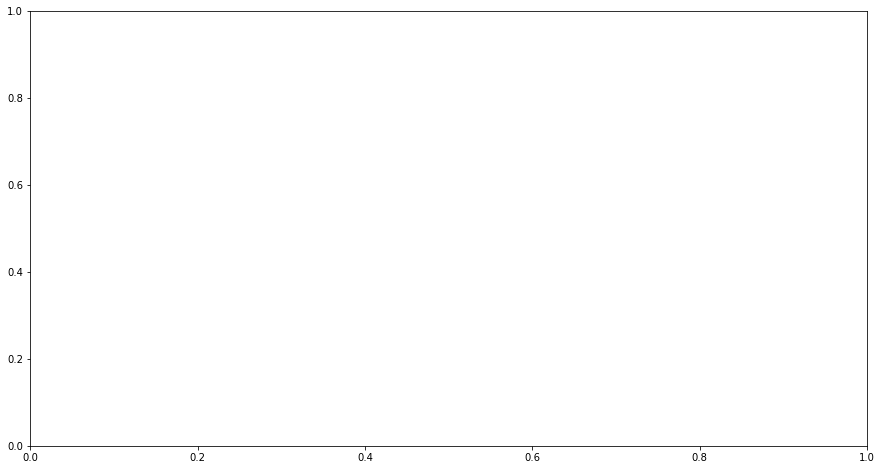

In [15]:
elemento = 'EU'
dfg = dfni.iloc[:,:][dfni[elemento].isna()==False]

plt.rcParams["figure.figsize"] = (15,8)

plot = dfni.plot(kind='scatter', x='EU', y='YB',zorder=2, legend=None)
# Turn on the grid

plt.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,
    labelleft=False) # labels along the bottom edge are off


#plt.grid(axis = 'y', linestyle='solid',zorder=0)
#plt.grid(which='major', linestyle=':', linewidth='0.2', color='green')
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.title("Área de Unidades Geológicas mayores a 5.000 Km2",fontsize=25,fontweight=300)
plt.xlabel("Unidades",fontsize=15,rotation=0)

#FUNCIÓN PARA AGREGAR ETIQUETAS DE DATOS
#add_value_labels(plot)

plt.ylabel("Área Km2")
#plt.grid()

#plt.bar(dic.keys(), dic.values([0][0]))
plt.show()

# Comienzo modelo de Random Forest para regresión


In [10]:
#elemento a predecir:
elemento = 'CU'

columnas = df.columns.to_list()
columnasInteres = ['ROCK NAME', 'MINERAL', 'SIO2',
 'TIO2',  'AL2O3',
 'FE2O3',
 'FEO',
 'NIO',
 'MNO',
 'MGO',
 'SRO',
 'NA2O',
 'K2O',
 'P2O5',
 'MN',
 'NI',
 'CO',
 'CAO',
 elemento]

setC = set(columnas)
setCI = set(columnasInteres)

ExtractColumns = list(setC-setCI)

#Extraigo columnas que no me interesan del dataframe
dfmod = df.drop(ExtractColumns, axis =1)
#dfmod = dfmod.iloc[:,:][df[elemento].isna()==False]

print("Tamaño del dataset: {}".format(dfmod.shape[0]))
print("Ocurrencias de {} en la muestra: {}".format(elemento, dfmod[elemento].count()))

dfmod.head()


Tamaño del dataset: 3499
Ocurrencias de CU en la muestra: 1375


,ROCK NAME,MINERAL,SIO2,TIO2,AL2O3,FE2O3,FEO,NIO,MNO,MGO,CAO,SRO,NA2O,K2O,P2O5,MN,NI,CO,CU
0,GABBRONORITE,NaN,49.80,1.15,10.85,2.20,7.40,NaN,0.21,12.72,12.65,NaN,1.40,0.31,0.18,NaN,250.0,NaN,NaN
1,NORITE,NaN,49.25,1.38,18.75,2.10,7.78,NaN,0.16,6.60,10.75,NaN,1.94,0.40,0.22,NaN,121.0,NaN,NaN
2,GABBRONORITE,NaN,49.30,0.97,11.35,2.55,7.82,NaN,0.21,12.72,12.60,NaN,1.35,0.29,0.17,NaN,176.0,NaN,NaN
3,GABBRONORITE,NaN,49.60,0.75,13.50,3.30,6.95,NaN,0.10,11.62,11.75,NaN,1.10,0.25,0.27,NaN,126.0,NaN,NaN
4,GABBRONORITE,NaN,50.10,0.78,12.45,2.15,6.45,NaN,0.20,11.98,12.10,NaN,1.35,0.12,0.35,NaN,235.0,NaN,NaN


In [11]:
# determino matriz de características (X) y valor a predecir (y)
X = dfmod.iloc[:, 2:18].values
y = dfmod.iloc[:, 18].values

np.nan_to_num(X, copy=False)
np.nan_to_num(y, copy=False)

# Dividir el data set en conjunto de entrenamiento y conjunto de testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Escalado de variables
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#sc_y = StandardScaler()
#X_train = sc_X.fit_transform(X_train)
#X_test = sc_X.transform(X_test)


# Ajustar el Random Forest con el dataset
from sklearn.ensemble import RandomForestRegressor
regression = RandomForestRegressor(n_estimators = 300)
regression.fit(X_train, y_train)


y_pred = regression.predict(X_test)


# observamos Accurancy
scoreRF = regression.score(X_test, y_test)
print("R-squared:", round(scoreRF,4))

R-squared: 0.6993


In [12]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 

MSE:  2694.6516851767337
RMSE:  1347.3258425883669


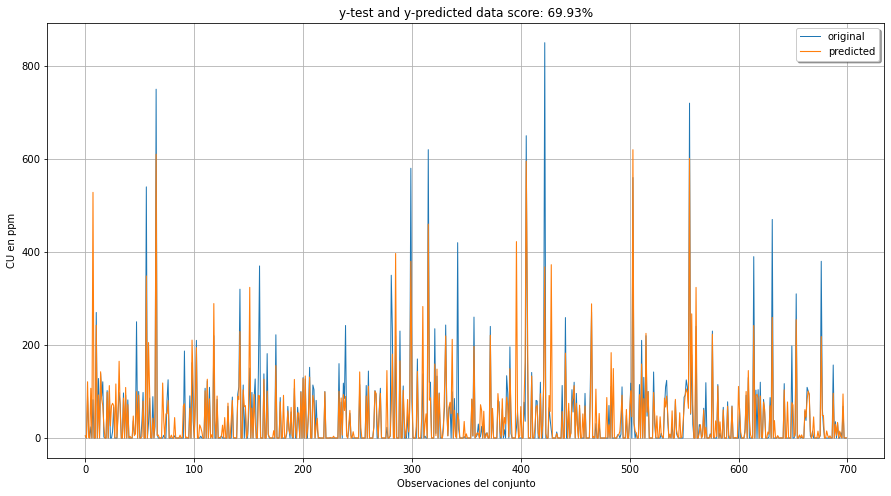

In [13]:
plt.rcParams["figure.figsize"] = (15,8)
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data score: {}%".format(round(scoreRF,4)*100))
plt.xlabel('Observaciones del conjunto')
plt.ylabel('{} en ppm'.format(elemento))
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 


In [14]:
pru =[[45.22,3.94,16.23,12.53,0,0,0.18,5.17,10.57,0,3.67,0.73,1.29,0,109.0,0]]

y = regression.predict(pru)
y

array([58.52666667])

## Modelo SVM no sirve porque el problema no es lineal


In [15]:
from sklearn.svm import SVR
regression = SVR(kernel = "rbf")
regression.fit(X_train, y_train)

# observamos Accurancy
scoreSVM = regression.score(X_test, y_test)
print("R-squared SVM:", scoreSVM)
print("R-squared RF:", scoreRF)

R-squared SVM: -0.011994332776998906
R-squared RF: 0.6992557404572441


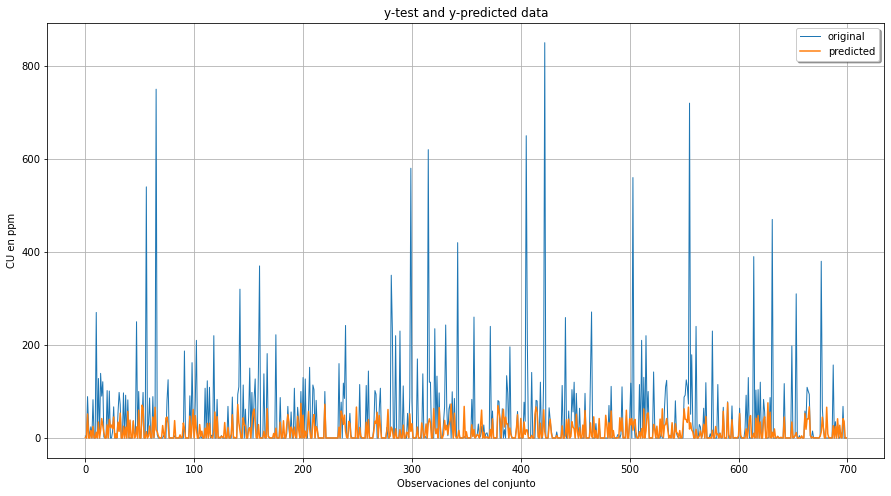

In [16]:
y_pred = regression.predict(X_test)


plt.rcParams["figure.figsize"] = (15,8)
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.5, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('Observaciones del conjunto')
plt.ylabel('{} en ppm'.format(elemento))
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 


In [18]:
regression.socore(predTree, y_test)

AttributeError: 'SVR' object has no attribute 'socore'

## Probanado Regresión Logística para el elemento y saber si tiene más de un valor deseado

In [30]:
#dfmod[elemento].apply(1 if dfmod[elemento]>0 else 0)
valorClase = 3

dfmod.loc[dfmod[elemento]>valorClase,'class']=1
dfmod.loc[dfmod[elemento]<=valorClase,'class']=0
dfmod['class']=pd.to_numeric(dfmod['class'], downcast='integer')

dfmod.head()

,ROCK NAME,MINERAL,SIO2,TIO2,AL2O3,FE2O3,FEO,NIO,MNO,MGO,CAO,SRO,NA2O,K2O,P2O5,MN,NI,CO,CU,class
0,GABBRONORITE,NaN,49.80,1.15,10.85,2.20,7.40,NaN,0.21,12.72,12.65,NaN,1.40,0.31,0.18,NaN,250.0,NaN,0.0,0
1,NORITE,NaN,49.25,1.38,18.75,2.10,7.78,NaN,0.16,6.60,10.75,NaN,1.94,0.40,0.22,NaN,121.0,NaN,0.0,0
2,GABBRONORITE,NaN,49.30,0.97,11.35,2.55,7.82,NaN,0.21,12.72,12.60,NaN,1.35,0.29,0.17,NaN,176.0,NaN,0.0,0
3,GABBRONORITE,NaN,49.60,0.75,13.50,3.30,6.95,NaN,0.10,11.62,11.75,NaN,1.10,0.25,0.27,NaN,126.0,NaN,0.0,0
4,GABBRONORITE,NaN,50.10,0.78,12.45,2.15,6.45,NaN,0.20,11.98,12.10,NaN,1.35,0.12,0.35,NaN,235.0,NaN,0.0,0


In [43]:
# determino matriz de características (X) y valor a predecir (y)
X = dfmod.iloc[:, 2:18].values
y = dfmod.iloc[:, 19].values

np.nan_to_num(X, copy=False)
np.nan_to_num(y, copy=False)

# Dividir el data set en conjunto de entrenamiento y conjunto de testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


# Ajustar el modelo de Regresión Logística en el Conjunto de Entrenamiento
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [44]:
# Predicción de los resultados con el Conjunto de Testing
y_pred  = classifier.predict(X_test)

# Elaborar una matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[411,  44],
       [ 51, 194]], dtype=int64)

In [45]:
scoreLR = round(classifier.score(X_test, y_test),4)
print(scoreLR)

0.8643


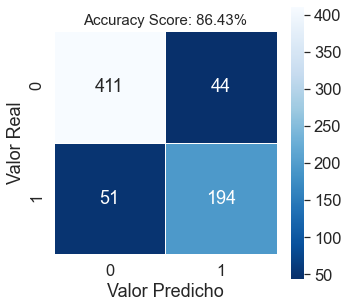

In [52]:
# MATRIZ DE CONFUSION 

plt.figure(figsize=(5,5))
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Valor Real');
plt.xlabel('Valor Predicho');
all_sample_title = 'Accuracy Score: {}%'.format(round(scoreLR*100,4))
plt.title(all_sample_title, size = 15);

C:\Users\HP\AppData\Local\Temp/ipykernel_16664/3302625337.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


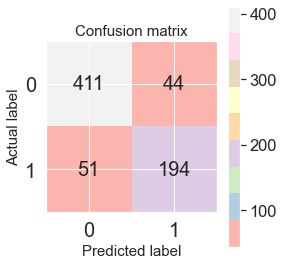

In [47]:
plt.figure(figsize=(4,4))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["0", "1"], size = 20)
plt.yticks(tick_marks, ["0", "1"], size = 20)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape

for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x), 
        horizontalalignment='center',
        verticalalignment='center',
        size=20)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


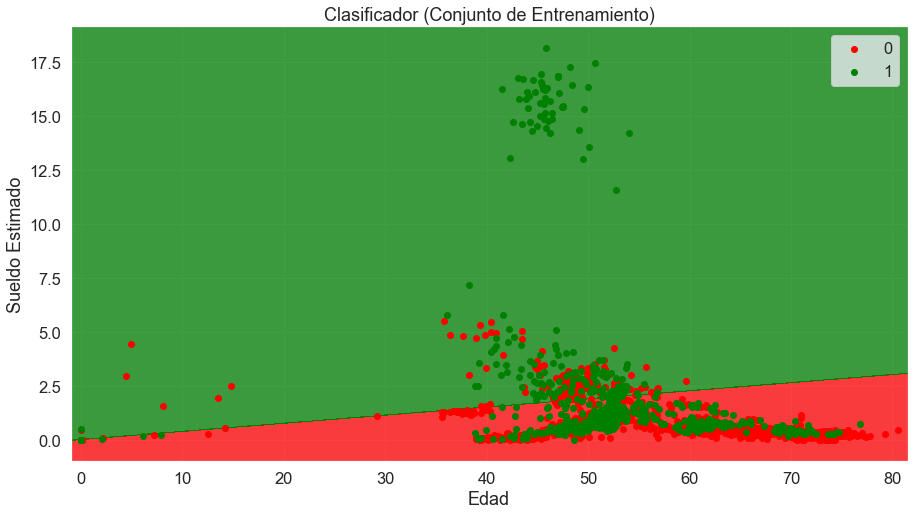

In [41]:
# Representación gráfica de los resultados del algoritmo en el Conjunto de Entrenamiento
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Clasificador (Conjunto de Entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()





In [ ]:
# Representación gráfica de los resultados del algoritmo en el Conjunto de Testing
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Clasificador (Conjunto de Test)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()




